# Zomato Bangalore Restaurants Data Analysis

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**Reading Data**

In [2]:
df = pd.read_csv("Fully Cleaned Zomato Data.csv")
df.head()

,url,name,online_order,book_table,ratings,votes,location,rest_type,cuisines,cost_for_two,listed_in(type)
0,https://www.zomato.com/24-7RestaurantBangalore,24/7 - The Lalit Ashok Bangalore,No,Yes,4.0,344,Seshadripuram,Fine Dining,"Continental, North Indian, Italian, Chinese",3000.0,"Buffet, Dine-out"
1,https://www.zomato.com/29degreesnorth,29 Degrees North,Yes,No,3.9,287,Banaswadi,Quick Bites,"North Indian, Fast Food, Street Food",250.0,"Delivery, Dine-out"
2,https://www.zomato.com/ArborBrewIndia,Arbor Brewing Company,No,Yes,4.5,8419,Brigade Road,"Pub, Microbrewery","American, Continental",2000.0,"Dine-out, Drinks & nightlife, Pubs and bars"
3,https://www.zomato.com/BaluchiBangalore,Baluchi - The Lalit Ashok Bangalore,No,Yes,4.0,134,Seshadripuram,Fine Dining,"North Indian, Kashmiri, Mughlai",3700.0,Dine-out
4,https://www.zomato.com/Barebones,Barebones - The Balcony Bar,No,Yes,4.2,2445,Indiranagar,"Bar, Casual Dining","Chinese, Continental, Finger Food, Italian",1500.0,"Dine-out, Drinks & nightlife, Pubs and bars"


## **Overview of the Data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12453 entries, 0 to 12452
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              12453 non-null  object 
 1   name             12453 non-null  object 
 2   online_order     12453 non-null  object 
 3   book_table       12453 non-null  object 
 4   ratings          12453 non-null  float64
 5   votes            12453 non-null  int64  
 6   location         12453 non-null  object 
 7   rest_type        12453 non-null  object 
 8   cuisines         12453 non-null  object 
 9   cost_for_two     12453 non-null  float64
 10  listed_in(type)  12453 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 1.0+ MB


*All columns have appropriate data types*

In [4]:
df.isnull().sum()

url                0
name               0
online_order       0
book_table         0
ratings            0
votes              0
location           0
rest_type          0
cuisines           0
cost_for_two       0
listed_in(type)    0
dtype: int64

*There are no null values*

In [5]:
df.nunique()

url                12453
name                8758
online_order           2
book_table             2
ratings               50
votes               1256
location              95
rest_type             92
cuisines            2608
cost_for_two         217
listed_in(type)       54
dtype: int64

*There are 12453 unique urls means there are 12453 unique restaurants*\
*But the unique names are 8758 only means there are many same names restaurants with multiple branches*

In [6]:
df.describe()

,ratings,votes,cost_for_two
count,12453.000000,12453.000000,12453.000000
mean,3.331976,183.629005,486.939416
std,0.991121,599.962288,389.629662
min,0.000000,0.000000,40.000000
25%,3.200000,4.000000,250.000000
50%,3.500000,25.000000,400.000000
75%,3.900000,122.000000,600.000000
max,5.000000,16832.000000,6000.000000


*Mostly restaurants have less than 4.0 votes but there are some which have full 5.0 votes*\
*Mostly restaurants got less than 122 votes but there are some restaurants which got maximum upto 16k+ votes*\
*The average cost for two people for maximum restaurants is between 200-600Rs but there are some which have maximum upto 6000Rs*

In [7]:
df.describe(include='object')

,url,name,online_order,book_table,location,rest_type,cuisines,listed_in(type)
count,12453,12453,12453,12453,12453,12453,12453,12453
unique,12453,8758,2,2,95,92,2608,54
top,https://www.zomato.com/24-7RestaurantBangalore,Cafe Coffee Day,Yes,No,Whitefield,Quick Bites,North Indian,"Delivery, Dine-out"
freq,1,54,6496,11511,884,5090,740,4619


*There are 54 branches of "Cafe Coffee Day" in Bangalore itself at different locations*\
*6496 out of 12453 restaurants have Online Order Services*\
*11511 out of 12453 restaurants does'nt provide Booking Table Services*\
*Whitefield location has alone 884/12453 restaurants in Bangalore*\
*5090 out of 12453 restaurants are only Quick Bites*\
*North Indian cuisine is available in most of the restaurants*\
*Most of the Restaurants are only Delivery and Dine-out*

## **Name**

In [8]:
df["name"].value_counts().head(10)

name
Cafe Coffee Day      54
Domino's Pizza       38
Just Bake            38
Five Star Chicken    37
Pizza Hut            37
Faasos               29
KFC                  28
Baskin Robbins       27
Kanti Sweets         27
Sweet Truth          26
Name: count, dtype: int64

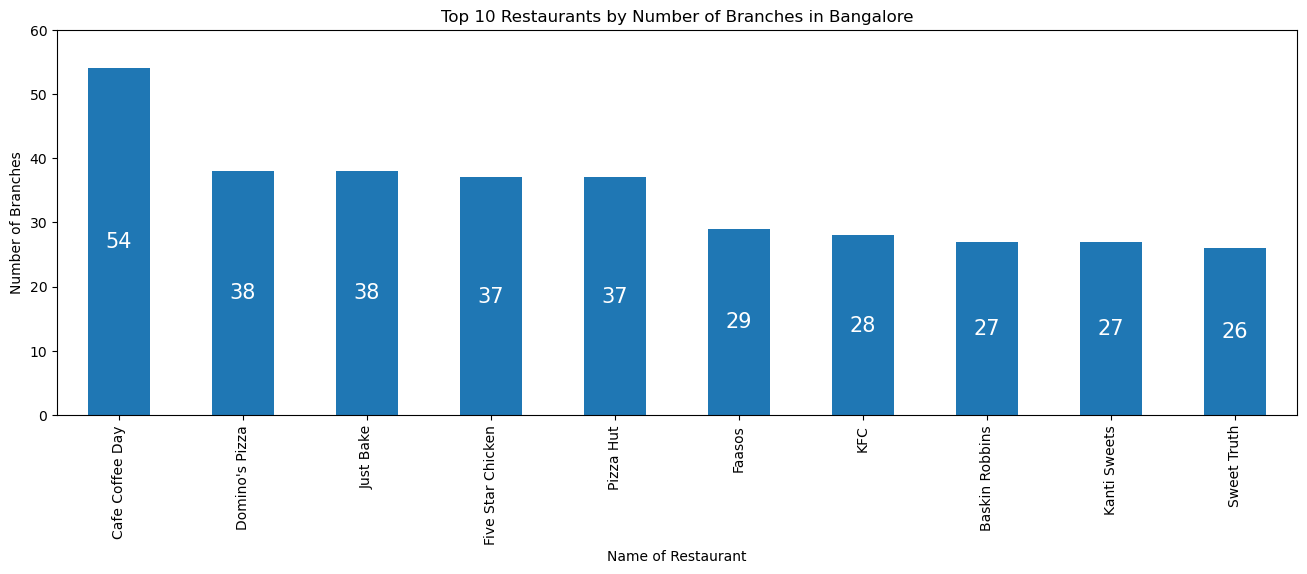

In [9]:
ax = df["name"].value_counts().head(10).plot(kind="bar",
                                        xlabel="Name of Restaurant",
                                        ylabel="Number of Branches",
                                        title="Top 10 Restaurants by Number of Branches in Bangalore",
                                        ylim=[0,60],
                                        figsize=(16,5))
ax.bar_label(ax.containers[0],label_type='center',color='w',fontsize=15)
plt.savefig("Top10.jpg")
plt.show()

**The Cafe Coffee Day has most number of outlets in Bangalore followed by Domino's Pizza and Just Bake**

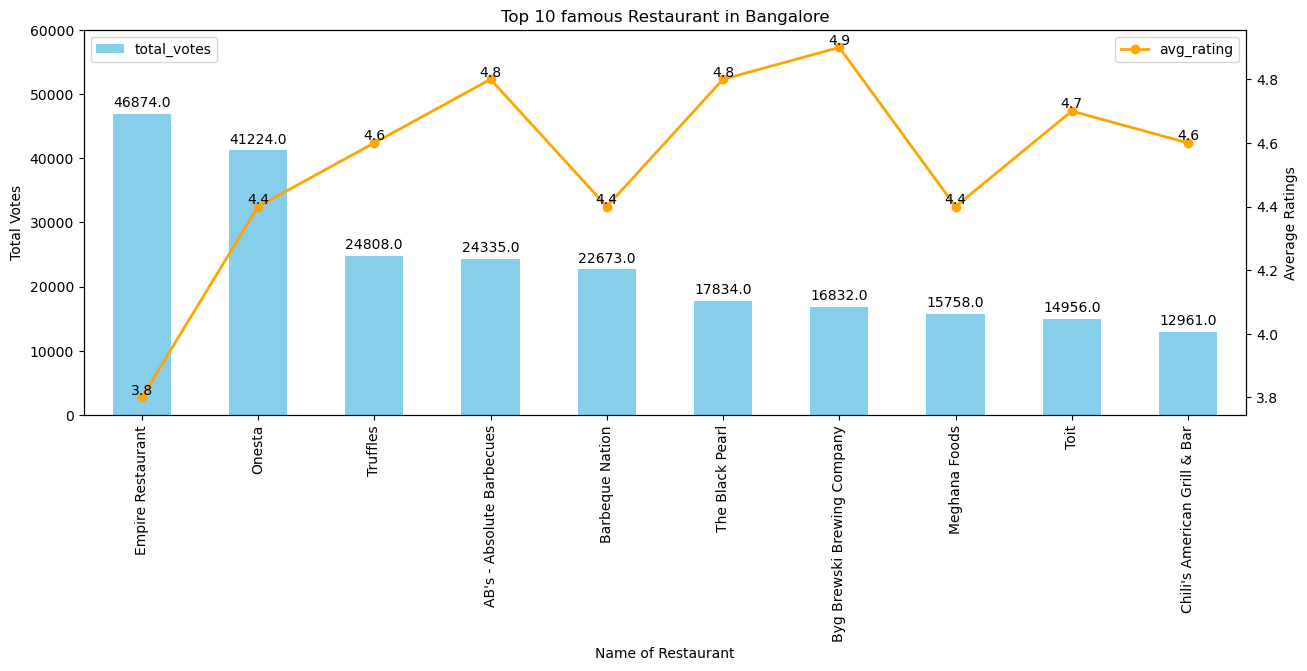

In [157]:
#Calculating Restaurants wise average ratings and total votes
famous = df.groupby('name').agg(
                                total_votes=("votes", "sum"),
                                avg_rating=("ratings", "mean")
                                ).round(1).sort_values(["total_votes","avg_rating"], ascending=False).head(10)

plt.figure(figsize=(15,5))

#Total Votes Bar chart
ax1 = famous.total_votes.plot(kind='bar',
                       ylabel="Total Votes",
                       xlabel="Name of Restaurant",
                       ylim=[0,60000],
                       color="skyblue",
                       title="Top 10 famous Restaurant in Bangalore")
ax1.bar_label(ax1.containers[0], padding=3, fmt="%.1f")

#Average Ratings Line Chart
ax2 = ax1.twinx()
famous.avg_rating.plot(
                       ylabel="Average Ratings",
                       ax=ax2,
                       color='orange', marker='o', linewidth=2
                       )

for x, y in zip(np.arange(10), famous['avg_rating']):
    ax2.text(x, y, f'{y:0.1f}', color='black', ha='center', va='bottom', fontsize=10)

lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, loc='upper left')
lines, labels = ax2.get_legend_handles_labels()
ax2.legend(lines, labels, loc='upper right')

ax.bar_label(ax.containers[0])
plt.show()

**We can say that the "Empire Restaurant" is the most famous restaurant in Bangalore with average ratings of 3.8\
followed by "Onesta" and "Truffles" with average ratings of 4.4 and 4.6 respectively**

## **Online Order & Table Booking Services**

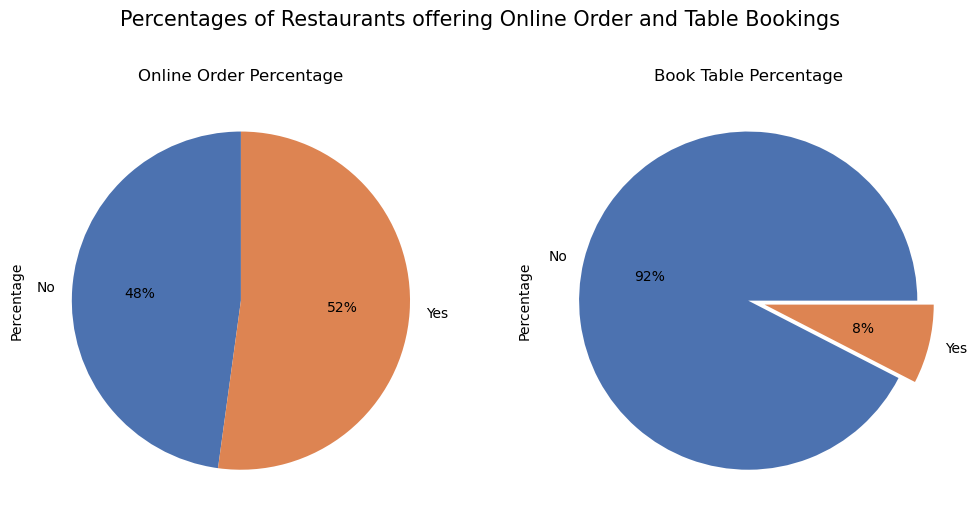

In [10]:
fig,ax = plt.subplots(1,2,figsize=(12,6))
df.online_order.value_counts().sort_index().plot(kind='pie',
                                    ylabel="Percentage",
                                    startangle=90,
                                    autopct = '%0.0f%%',
                                    colors = sns.color_palette('deep'),
                                    title="Online Order Percentage",
                                    ax =ax[0])
df.book_table.value_counts().sort_index().plot(kind='pie',
                                  ylabel="Percentage",
                                  startangle=0,
                                  autopct = '%0.0f%%',
                                  explode = [0.0,0.1],
                                  colors = sns.color_palette('deep'),
                                  title="Book Table Percentage",
                                  ax =ax[1])
plt.suptitle("Percentages of Restaurants offering Online Order and Table Bookings",fontsize=15)
plt.show()

**52% of Restaurants provide Online Order Services but only 8% of Restaurants provide Table Booking**

## **Rating, Votes and Cost for Two**

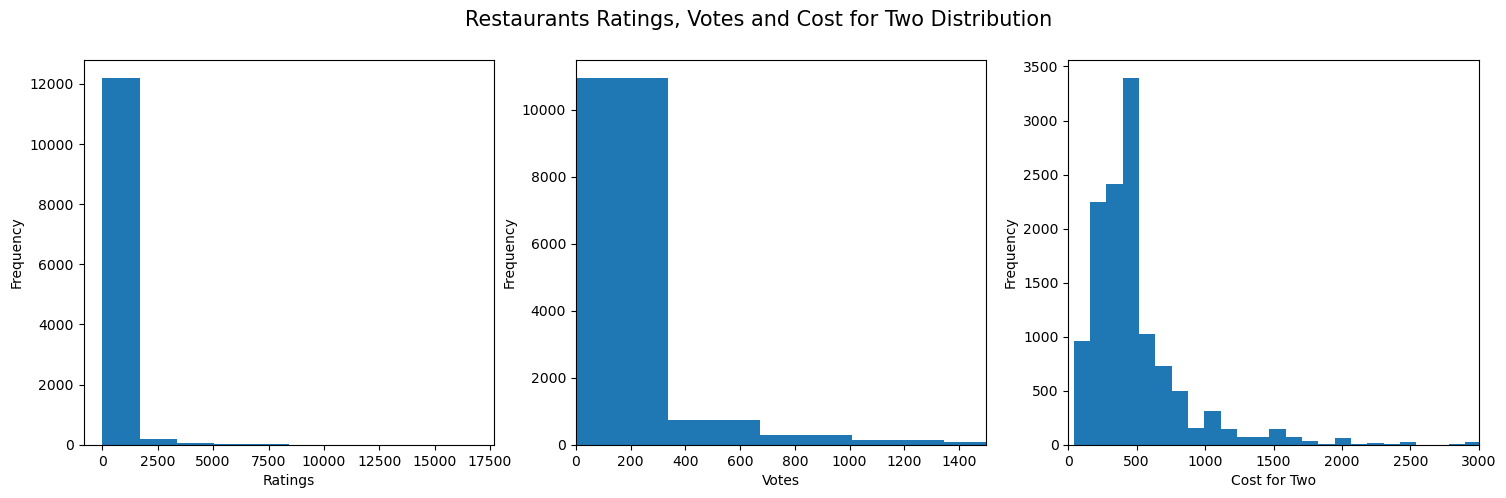

In [11]:
fig,ax = plt.subplots(1,3,figsize=(18,5))
df.votes.plot(kind='hist',
               xlabel = "Ratings",
               ax=ax[0])

df.votes.plot(kind='hist',
               xlabel = "Votes",
               bins=50,
               xlim=(0,1500),
               ax=ax[1])

df.cost_for_two.plot(kind='hist',
               xlabel = "Cost for Two",
               bins=50,
               xlim=(0,3000),
               ax=ax[2])

plt.suptitle("Restaurants Ratings, Votes and Cost for Two Distribution",fontsize=15)
plt.show()

**Most Restaurants have votes between 3 and 4**\
**Most Restaurants got upto 300 votes**\
**The Average Cost for Two people in most of the restaurants is around 500Rs**

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


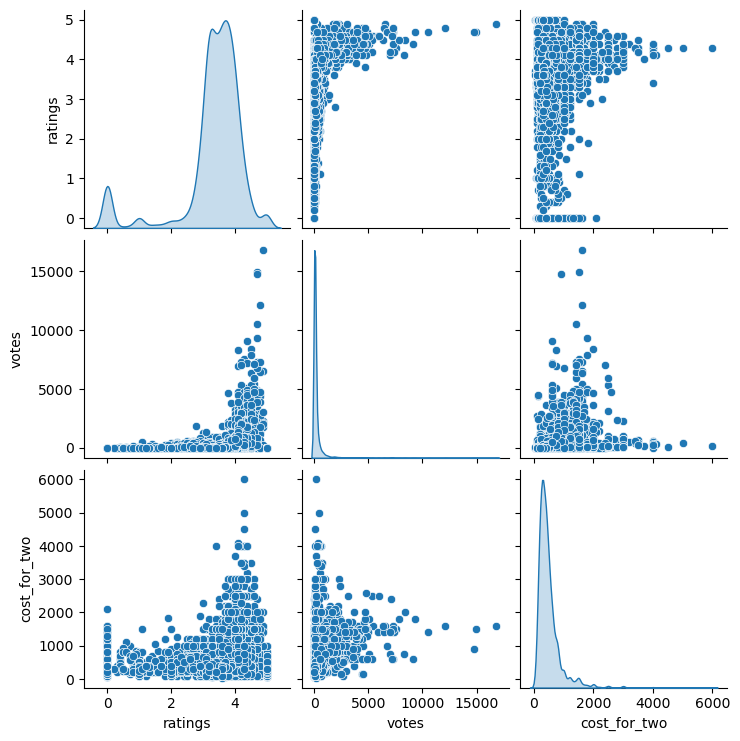

In [137]:
sns.pairplot(df[["ratings","votes","cost_for_two"]],diag_kind='kde')

**No significant relationship between each other**

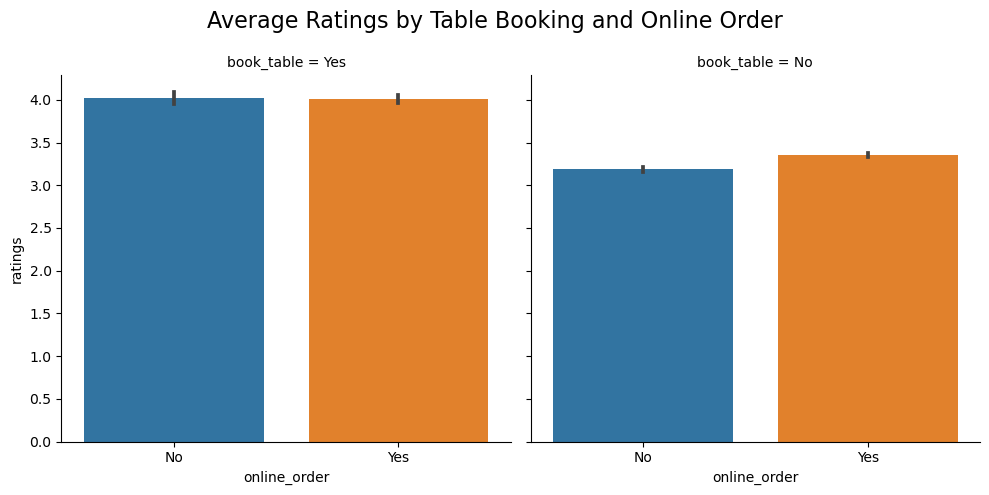

In [12]:
g = sns.catplot(data=df,
            x="online_order",
            y="ratings",
            col="book_table",
            estimator="mean",
            kind='bar',
            height=5,
            aspect=1)
g.fig.suptitle("Average Ratings by Table Booking and Online Order", fontsize=16)
g.fig.subplots_adjust(top=0.85)  # Adjust the top spacing so title doesn't overlap
plt.show()


**The Restaurants who provide table booking services tend to have higher votes than who doesn't**\
**The Restaurants who provide both the services have higher votes than who provide only online ordering service**

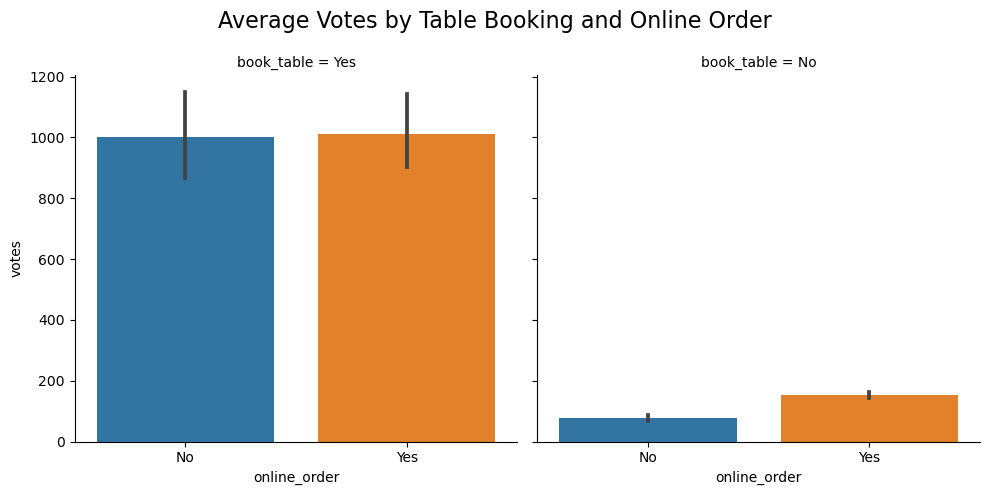

In [13]:
g = sns.catplot(data=df,
            x="online_order",
            y="votes",
            col="book_table",
            estimator="mean",
            kind='bar',
            height=5,
            aspect=1)
g.fig.suptitle("Average Votes by Table Booking and Online Order", fontsize=16)
g.fig.subplots_adjust(top=0.85)  # Adjust the top spacing so title doesn't overlap
plt.show()

**The Restaurants who provide table booking services tend to have higher number of votes than who doesn't**\
**The Restaurants who provide both the services have higher number of votes than who provide only online ordering service**\

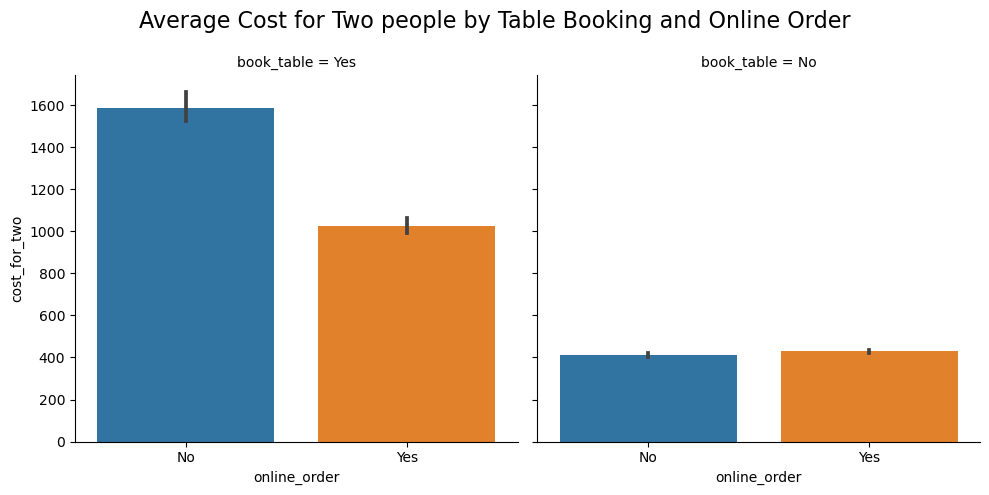

In [14]:
g = sns.catplot(data=df,
            x="online_order",
            y="cost_for_two",
            col="book_table",
            estimator="mean",
            kind='bar',
            height=5,
            aspect=1)
g.fig.suptitle("Average Cost for Two people by Table Booking and Online Order", fontsize=16)
g.fig.subplots_adjust(top=0.85)  # Adjust the top spacing so title doesn't overlap
plt.show()

**The Restaurants who provide table booking services tend to higher cost for two people than who doesn't**\
**The Restaurants who provide both the services have low cost for two people than who provide only table booking service**\

## **Location Analysis**

In [15]:
df["location"].value_counts()

location
Whitefield           884
Electronic City      731
BTM                  723
HSR                  703
Marathahalli         685
                    ... 
Govindaraja Nagar      1
Peenya                 1
Jakkur                 1
Kengeri                1
Cholourpalya           1
Name: count, Length: 95, dtype: int64

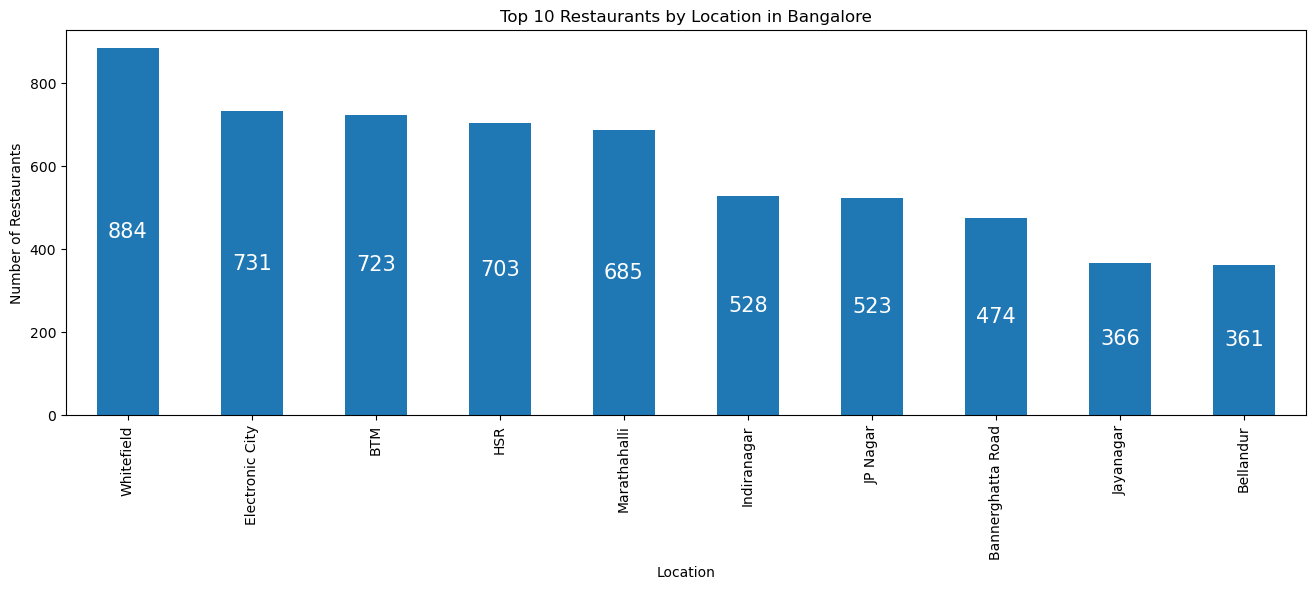

In [16]:
ax = df["location"].value_counts().head(10).plot(kind="bar",
                                        xlabel="Location",
                                        ylabel="Number of Restaurants",
                                        title="Top 10 Restaurants by Location in Bangalore",
                                        #ylim=[0,60],
                                        figsize=(16,5))
ax.bar_label(ax.containers[0],label_type='center',color='w',fontsize=15)
plt.show()

**Whitefield has most number of outlets in Bangalore followed by Electronic City and BTM**

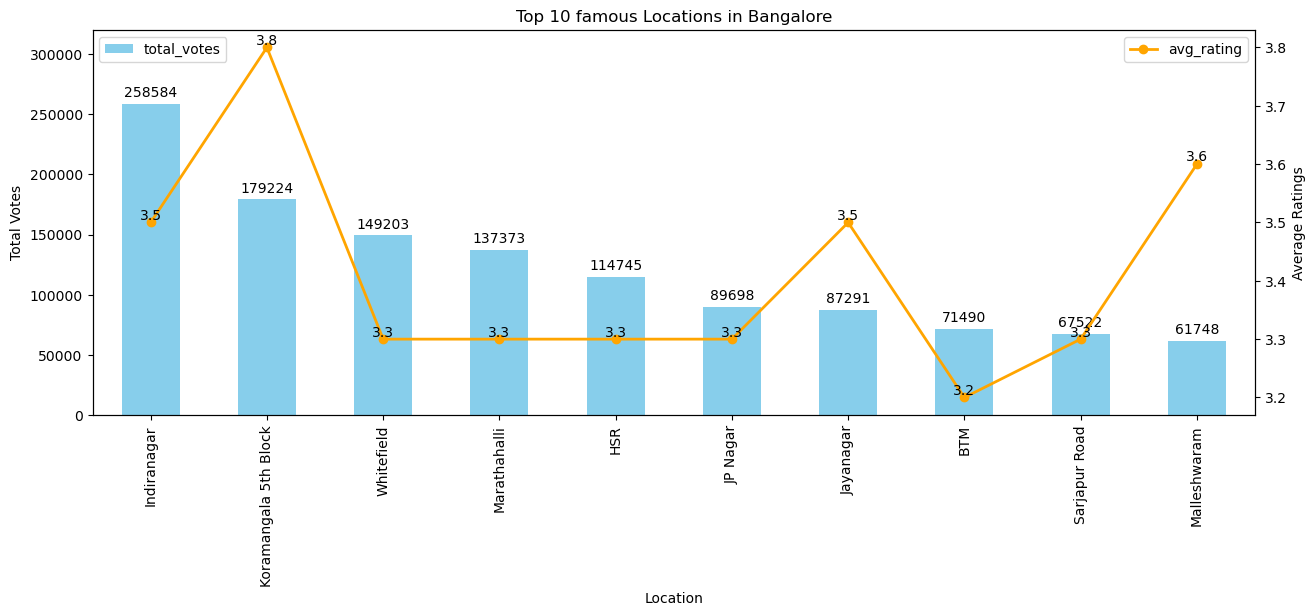

In [166]:
#Calculating location wise ratings mean and votes sum
top10_locs = df.groupby("location").agg(
    avg_rating=("ratings", "mean"),
    total_votes=("votes", "sum")
).round(1).sort_values(["total_votes","avg_rating"], ascending=False).head(10)

plt.figure(figsize=(15,5))
ax1 = top10_locs.total_votes.plot(kind='bar',
                       ylabel="Total Votes",
                       xlabel="Location",
                       ylim=[0,320000],
                       color="skyblue",
                       title="Top 10 famous Locations in Bangalore")
ax1.bar_label(ax1.containers[0], padding=3,fmt="%d")
ax2 = ax1.twinx()
top10_locs.avg_rating.plot(
                       ylabel="Average Ratings",
                       xlabel="Location",
                       ax=ax2,
                       color='orange', marker='o', linewidth=2
                       )

for x, y in zip(np.arange(10), top10_locs['avg_rating']):
    ax2.text(x, y, f'{y:0.1f}', color='black', ha='center', va='bottom', fontsize=10)

lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, loc='upper left')
lines, labels = ax2.get_legend_handles_labels()
ax2.legend(lines, labels, loc='upper right')

ax.bar_label(ax.containers[0])
plt.show()

**Indiranagar is the most famous location in Bangalore with 250k+ votes and average rating of 3.5\
followed by Koramangala 5th Block with around 180k votes and average rating of 3.8**

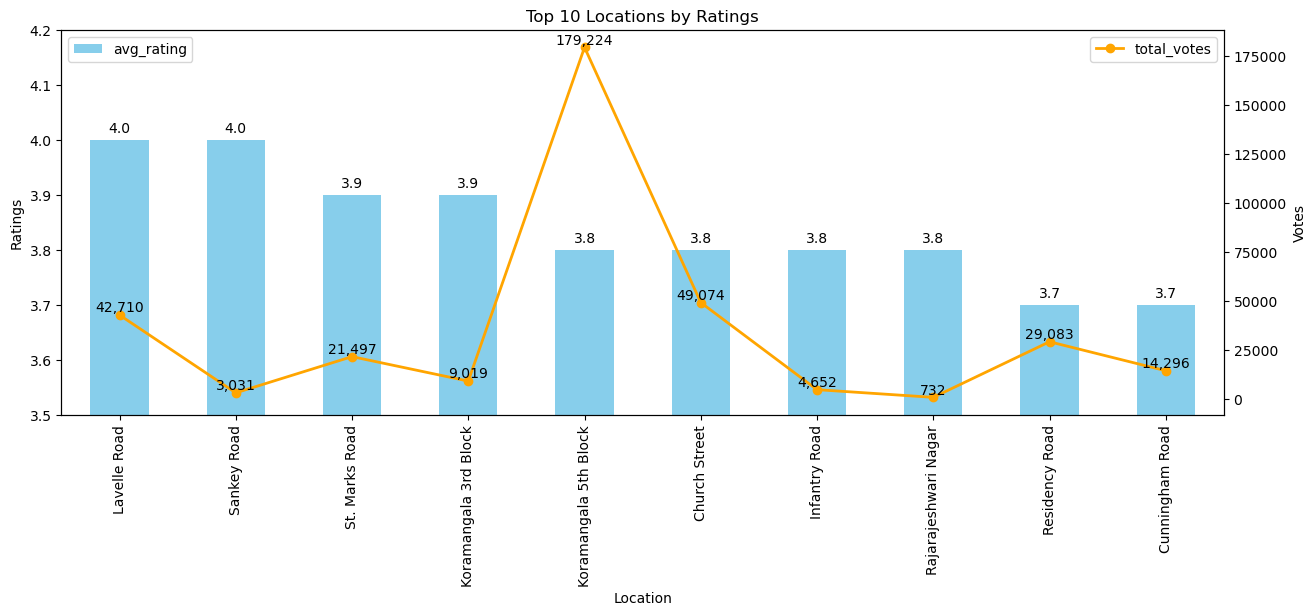

In [60]:
#Calculating location wise ratings mean and votes sum
top10_locs = df.groupby("location").agg(
    avg_rating=("ratings", "mean"),
    total_votes=("votes", "sum")
).round(1).sort_values(["avg_rating","total_votes"], ascending=False).head(10)

plt.figure(figsize=(15,5))
ax1 = top10_locs.avg_rating.plot(kind='bar',
                       #y="ratings",
                       ylabel="Ratings",
                       xlabel="Location",
                       ylim=[3.5,4.2],
                       color="skyblue",
                       title="Top 10 Locations by Ratings")
ax1.bar_label(ax1.containers[0], padding=3, fmt="%.1f")
ax2 = ax1.twinx()
top10_locs.total_votes.plot(
                       #y="votes",
                       ylabel="Votes",
                       xlabel="Location",
                       ax=ax2,
                       color='orange', marker='o', linewidth=2
                       )

for x, y in zip(np.arange(10), top10_locs['total_votes']):
    ax2.text(x, y+50, f'{int(y):,}', color='black', ha='center', va='bottom', fontsize=10)

lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, loc='upper left')
lines, labels = ax2.get_legend_handles_labels()
ax2.legend(lines, labels, loc='upper right')

ax.bar_label(ax.containers[0])
plt.show()

**Restaurants in Lavelle Road and Sankey Road has highest average ratings of 4.0\
with Lavelled Road having much higher votes than Sankey Road\
followed by St. Marks Road and Koramangala 3rd Block with average ratings of 3.9**

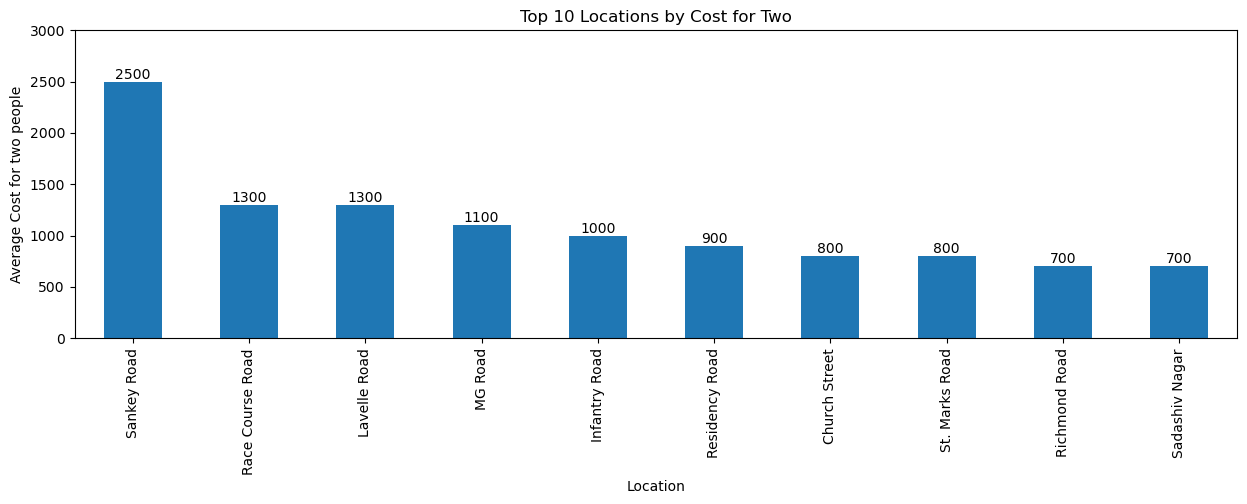

In [305]:
locs = df.groupby("location")["cost_for_two"].mean().round(-2).sort_values(ascending=False)
plt.figure(figsize=(15,4))
ax = locs.head(10).plot(kind='bar',
                       y="cost_for_two",
                       ylabel="Average Cost for two people",
                       xlabel="Location",
                       ylim=[0,3000],
                       title="Top 10 Locations by Cost for Two"
                       )
ax.bar_label(ax.containers[0])
plt.show()

**Restaurants in Sankey Road has much higher average cost for two people(2500Rs)\
followed by Race Course Road(1300Rs) and Lavelle Road(1300Rs)**

## **Restaurant Types**

In [42]:
df.rest_type.value_counts()

rest_type
Quick Bites             5090
Casual Dining           2211
Delivery                 927
Takeaway, Delivery       750
Dessert Parlor           559
                        ... 
Cafe, Bar                  1
Microbrewery, Lounge       1
Bar, Pub                   1
Quick Bites, Mess          1
Lounge, Microbrewery       1
Name: count, Length: 92, dtype: int64

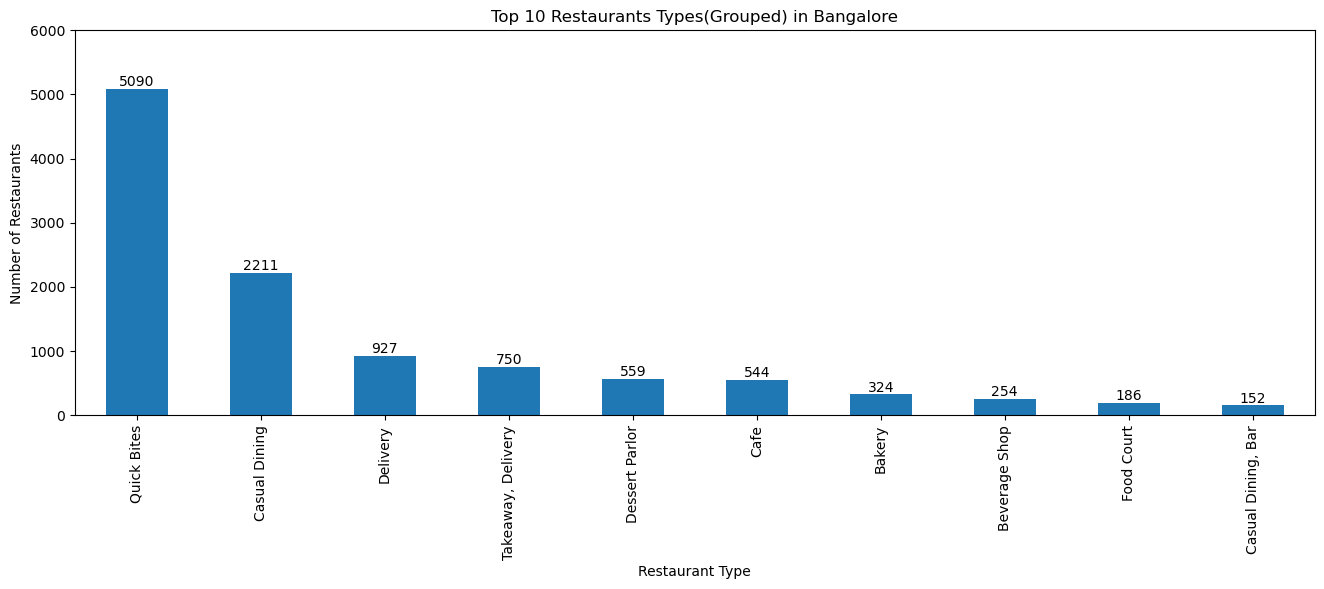

In [43]:
ax = df["rest_type"].value_counts().head(10).plot(kind="bar",
                                        xlabel="Restaurant Type",
                                        ylabel="Number of Restaurants",
                                        title="Top 10 Restaurants Types(Grouped) in Bangalore",
                                        ylim=[0,6000],
                                        figsize=(16,5))
ax.bar_label(ax.containers[0],label_type='edge',fontsize=10)
plt.show()

**The most number of Restaurants in Bangalore are Quick Bites followed by Casual Dining and Delivery only restaurants**

In [78]:
#Calculating percentage of unique restaurant types
uniq_restType = df.rest_type.str.split(', ').explode()
uniq_restType_perc = uniq_restType.value_counts().map(lambda x : round(x*100/df.shape[0],2))
uniq_restType_perc

rest_type
Quick Bites       43.82
Casual Dining     20.65
Delivery          13.47
Takeaway           6.33
Dessert Parlor     5.98
Cafe               5.65
Bakery             3.93
Beverage Shop      3.47
Bar                2.65
Food Court         1.85
Sweet Shop         1.57
Pub                0.96
Fine Dining        0.73
Lounge             0.67
Mess               0.63
Kiosk              0.52
Microbrewery       0.40
Food Truck         0.22
Confectionery      0.11
Dhaba              0.06
Club               0.05
Irani Cafee        0.01
Bhojanalya         0.01
Meat Shop          0.01
Pop Up             0.01
Name: count, dtype: float64

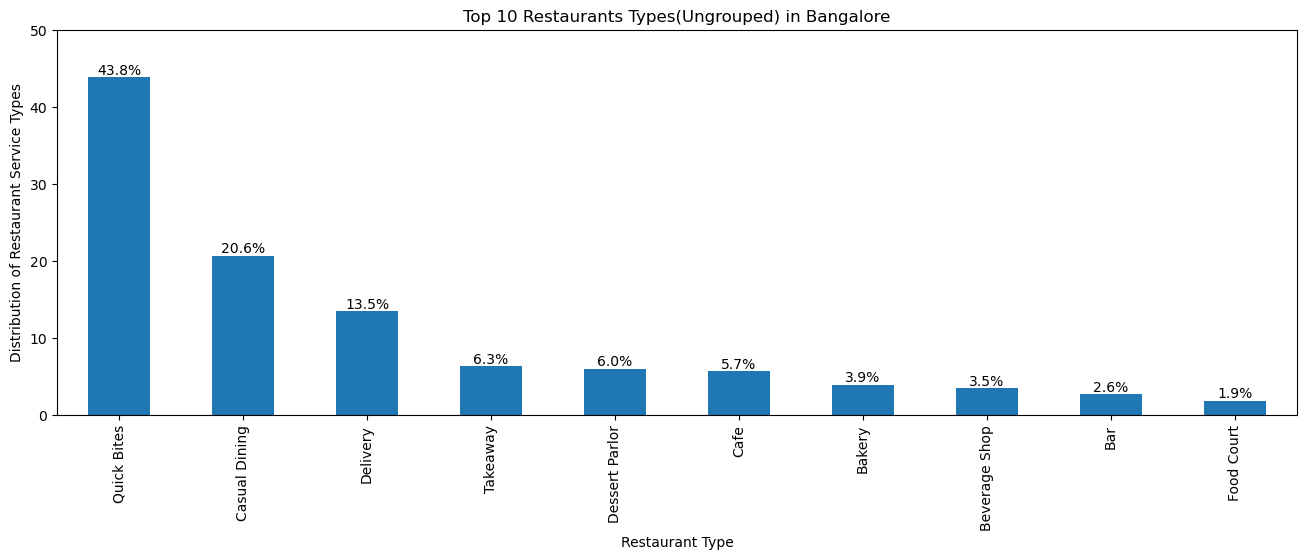

In [46]:
ax = uniq_restType_perc.head(10).plot(kind="bar",
                                xlabel="Restaurant Type",
                                ylabel="Distribution of Restaurant Service Types",
                                title="Top 10 Restaurants Types(Ungrouped) in Bangalore",
                                ylim=[0,50],
                                figsize=(16,5))
ax.bar_label(ax.containers[0],label_type='edge',fontsize=10,fmt="%0.1f%%")
plt.show()

**43.8% of restaurants are Quick Bites out of total Restaurants(12453) \
followed by Casual Dining(20.6%) and Delivery only restaurants(13.5%)**

In [81]:
#Calculating average ratings and total votes per unique restaurant types
uniqResType_ratings = pd.merge(uniq_restType,df[["ratings","votes"]],left_index=True,right_index=True)
uniqResType_ratings = uniqResType_ratings.groupby('rest_type').agg(
                                                avg_rating=("ratings", "mean"),
                                                total_votes=("votes", "sum")
                                            ).round(1).sort_values(["avg_rating","total_votes"], ascending=False).head(10)
uniqResType_ratings

,avg_rating,total_votes
rest_type,,
Irani Cafee,4.4,3730
Microbrewery,4.1,158961
Fine Dining,4.1,38090
Club,4.0,5050
Pub,3.9,181135
Lounge,3.9,68861
Confectionery,3.9,55
Bar,3.8,234472
Meat Shop,3.7,37


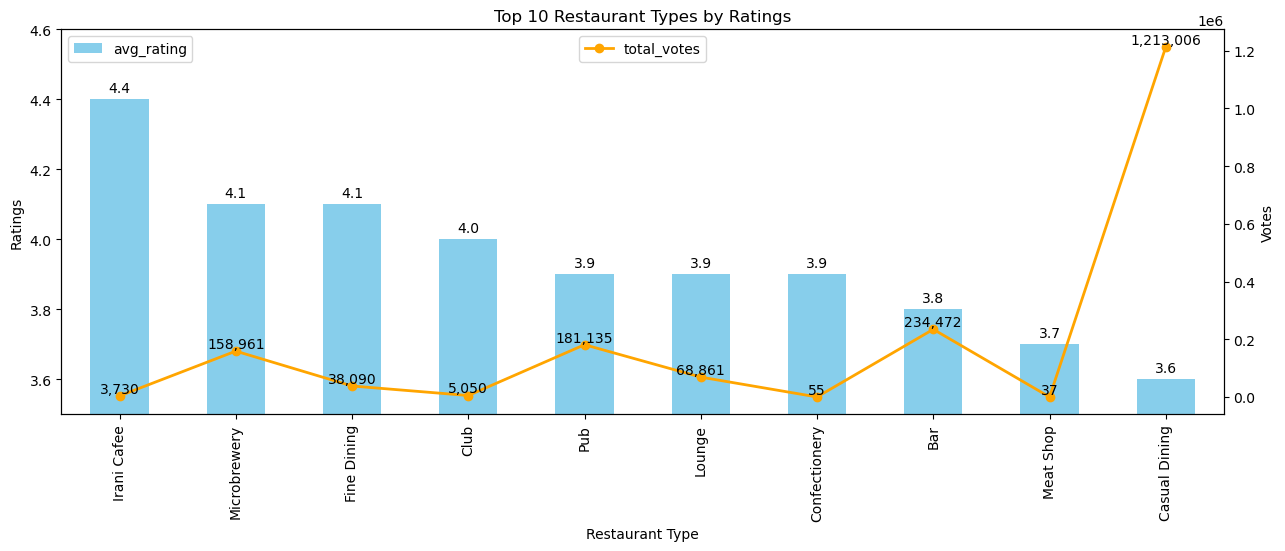

In [82]:
plt.figure(figsize=(15,5))
ax1 = uniqResType_ratings.avg_rating.plot(kind='bar',
                       ylabel="Ratings",
                       xlabel="Restaurant Type",
                       ylim=[3.5,4.6],
                       color="skyblue",
                       title="Top 10 Restaurant Types by Ratings")
ax1.bar_label(ax1.containers[0], padding=3, fmt="%.1f")
ax2 = ax1.twinx()
uniqResType_ratings.total_votes.plot(
                       ylabel="Votes",
                       ax=ax2,
                       color='orange', marker='o', linewidth=2
                       )

for x, y in zip(np.arange(10), uniqResType_ratings['total_votes']):
    ax2.text(x, y+50, f'{int(y):,}', color='black', ha='center', va='bottom', fontsize=10)

lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, loc='upper left')
lines, labels = ax2.get_legend_handles_labels()
ax2.legend(lines, labels, loc='upper center')

ax.bar_label(ax.containers[0])
plt.show()

**Irani Cafe has a higher average rating of 4.4, followed by Microbrewery and Fine Dining with average ratings of 4.1. \
However, the total number of votes for Irani Cafe (3,730) is significantly lower than those for Microbrewery (158,961) and Fine Dining (38,090). \
This suggests that the smaller group of reviewers for Irani Cafe gave it consistently high ratings, \
while the larger number of voters for Microbrewery and Fine Dining likely included more mixed or negative reviews, bringing their overall average down to 4.1.** 


In [119]:
#Calculating average cost for two people of unique restaurant types
uniqResType_cost = pd.merge(uniq_restType,df.cost_for_two,left_index=True,right_index=True)
uniqResType_cost = uniqResType_cost.groupby('rest_type')["cost_for_two"].mean().round(-2).sort_values(ascending=False)
uniqResType_cost

rest_type
Fine Dining       2800.0
Club              2000.0
Lounge            1800.0
Microbrewery      1600.0
Bar               1300.0
Pub               1300.0
Irani Cafee       1300.0
Casual Dining      800.0
Cafe               600.0
Pop Up             500.0
Bakery             400.0
Meat Shop          400.0
Food Court         400.0
Delivery           400.0
Takeaway           400.0
Food Truck         300.0
Dhaba              300.0
Dessert Parlor     300.0
Mess               300.0
Confectionery      300.0
Bhojanalya         300.0
Beverage Shop      300.0
Quick Bites        300.0
Sweet Shop         300.0
Kiosk              200.0
Name: cost_for_two, dtype: float64

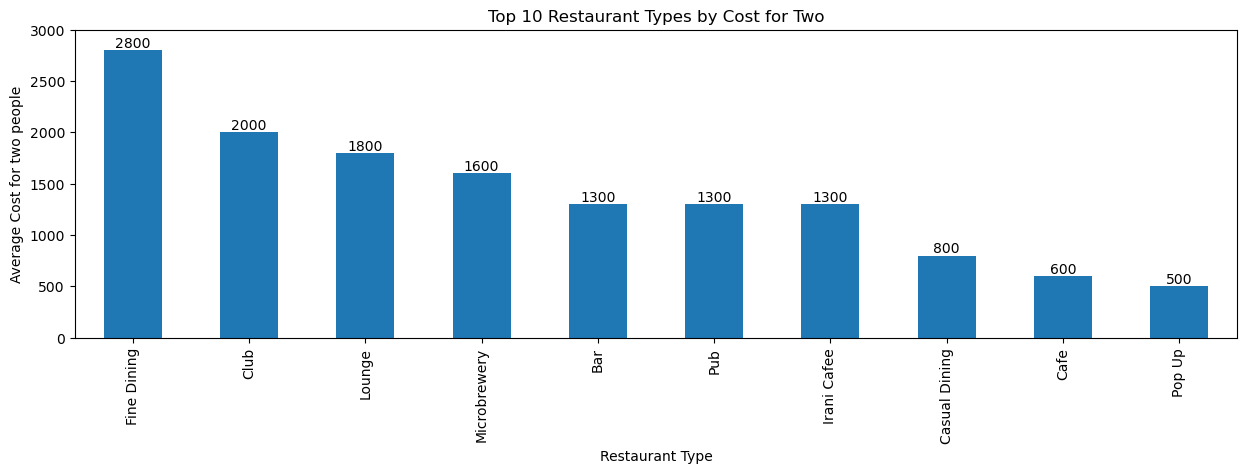

In [120]:
plt.figure(figsize=(15,4))
ax = uniqResType_cost.head(10).plot(kind='bar',
                       ylabel="Average Cost for two people",
                       xlabel="Restaurant Type",
                       ylim=[0,3000],
                       title="Top 10 Restaurant Types by Cost for Two"
                       )
ax.bar_label(ax.containers[0])
plt.show()

**Fine Dining Restaurants has higher average cost for two people(2800 Rs)\
followed by Clubs with 2000Rs and Lounge with 1800Rs**

## **Cuisines**

### Grouped

In [83]:
df.cuisines.value_counts()

cuisines
North Indian                                       740
South Indian                                       610
North Indian, Chinese                              570
Biryani                                            278
Bakery, Desserts                                   250
                                                  ... 
Kerala, Juices                                       1
North Indian, Asian, Seafood, Chinese                1
Beverages, Cafe, Juices, Fast Food                   1
Fast Food, Pizza, Rolls, Beverages, Juices           1
Finger Food, Continental, North Indian, Chinese      1
Name: count, Length: 2608, dtype: int64

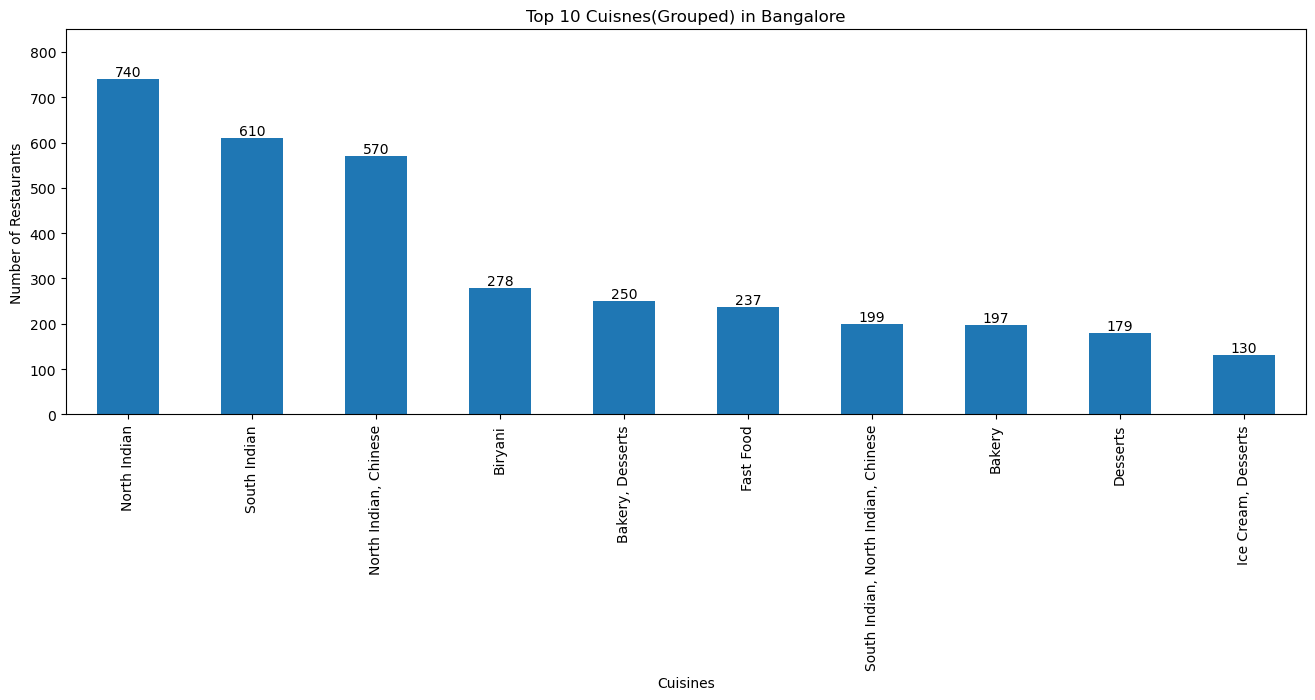

In [87]:
ax = df["cuisines"].value_counts().head(10).plot(kind="bar",
                                        xlabel="Cuisines",
                                        ylabel="Number of Restaurants",
                                        title="Top 10 Cuisnes(Grouped) in Bangalore",
                                        ylim=[0,850],
                                        figsize=(16,5))
ax.bar_label(ax.containers[0],label_type='edge',fontsize=10)
plt.show()

**The highest number of restaurants offer only North Indian cuisine, \
followed by those serving exclusively South Indian dishes and \
then restaurants that offer a combination of North Indian and Chinese cuisines.** 

### Ungrouped ( Multiple cusines in one Restaurant )

In [88]:
#Calculating percentage of unique cuisines
uniq_cuisines = df.cuisines.str.split(', ').explode()
uniq_cuisines_perc = uniq_cuisines.value_counts().map(lambda x : round(x*100/df.shape[0],2))
uniq_cuisines_perc

cuisines
North Indian    40.30
Chinese         28.76
South Indian    19.04
Fast Food       16.96
Biryani         14.10
                ...  
Mongolian        0.01
Vegan            0.01
Jewish           0.01
Bohri            0.01
Cantonese        0.01
Name: count, Length: 106, dtype: float64

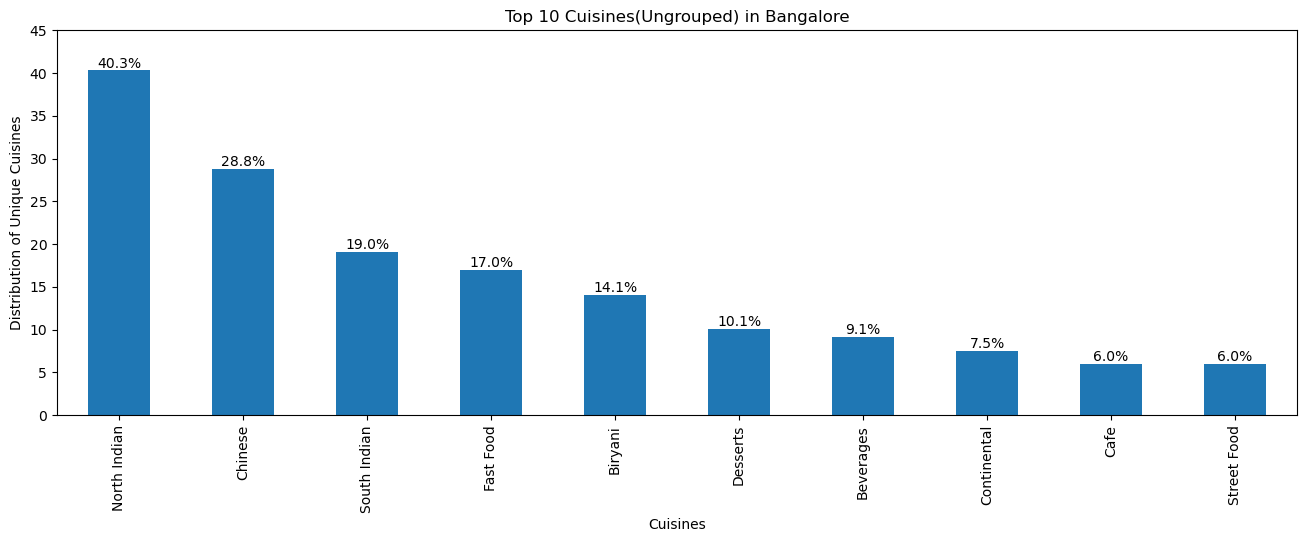

In [91]:
ax = uniq_cuisines_perc.head(10).plot(kind="bar",
                                xlabel="Cuisines",
                                ylabel="Distribution of Unique Cuisines",
                                title="Top 10 Cuisines(Ungrouped) in Bangalore",
                                ylim=[0,45],
                                figsize=(16,5))
ax.bar_label(ax.containers[0],label_type='edge',fontsize=10,fmt="%0.1f%%")
plt.show()

**40.3% of restaurants serves North Indian cuisines out of total Restaurants(12453) \
followed by Chinese(28.8%) and South Indian cuisines(19%)**

In [109]:
#Calculating average ratings and total votes per unique cuisines
uniqCuisines_ratings = pd.merge(uniq_cuisines,df[["ratings","votes"]],left_index=True,right_index=True)
uniqCuisines_ratings = uniqCuisines_ratings.groupby('cuisines').agg(
                                                avg_rating=("ratings", "mean"),
                                                total_votes=("votes", "sum")
                                            ).round(1).sort_values(["avg_rating","total_votes"], ascending=False).head(10)
uniqCuisines_ratings

,avg_rating,total_votes
cuisines,,
Belgian,4.7,677
Cantonese,4.6,2372
African,4.5,2250
Singaporean,4.4,6312
German,4.3,3978
Jewish,4.3,193
Vegan,4.3,193
Malaysian,4.2,17111
Burmese,4.2,8535


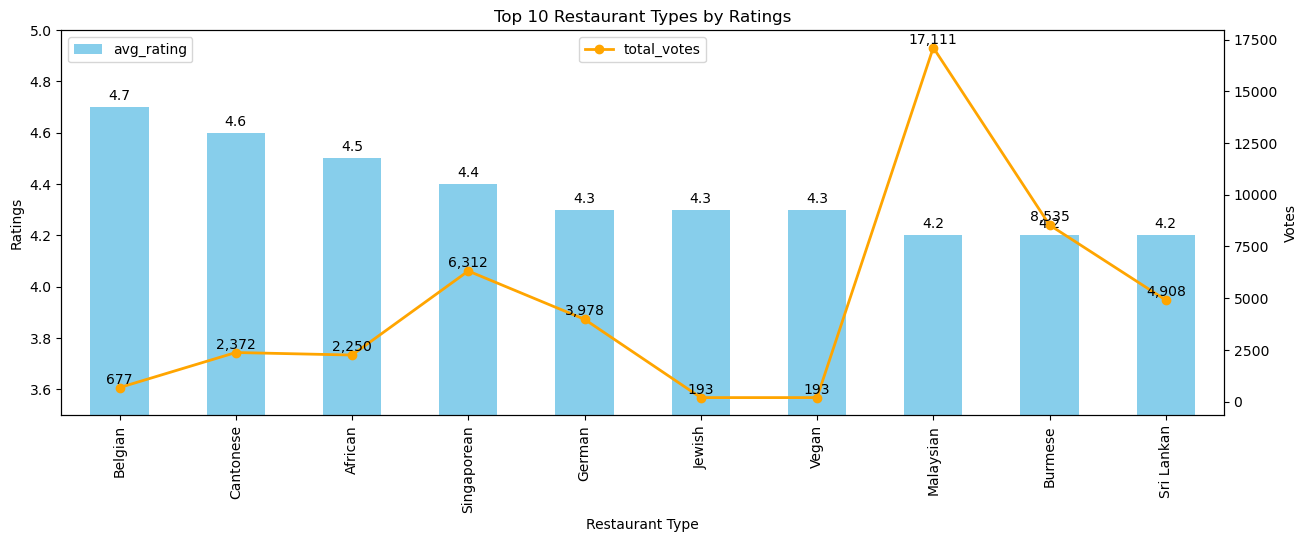

In [110]:
plt.figure(figsize=(15,5))
ax1 = uniqCuisines_ratings.avg_rating.plot(kind='bar',
                       ylabel="Ratings",
                       xlabel="Restaurant Type",
                       ylim=[3.5,5],
                       color="skyblue",
                       title="Top 10 Restaurant Types by Ratings")
ax1.bar_label(ax1.containers[0], padding=3, fmt="%.1f")
ax2 = ax1.twinx()
uniqCuisines_ratings.total_votes.plot(
                       ylabel="Votes",
                       ax=ax2,
                       color='orange', marker='o', linewidth=2
                       )

for x, y in zip(np.arange(10), uniqCuisines_ratings['total_votes']):
    ax2.text(x, y+50, f'{int(y):,}', color='black', ha='center', va='bottom', fontsize=10)

lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, loc='upper left')
lines, labels = ax2.get_legend_handles_labels()
ax2.legend(lines, labels, loc='upper center')

ax.bar_label(ax.containers[0])
plt.show()

**Belgian Cuisine has a higher average rating of 4.7, followed by Cantonese and African with average ratings of 4.6 and 4.5 resp. \
However, the total number of votes for Belgian Cuisine (677) is significantly lower than those for Cantonese (2372) and African (2250). \
This suggests that the smaller group of reviewers for Restaurants who serves Belgian Cuisine gave it consistently high ratings, \
while the larger number of voters for Restaurants who serves cuisine like Malaysian, Burmese, Singaporean likely included more mixed or negative reviews, bringing their overall average down.** 

In [117]:
#Calculating average cost for two people of unique cuisines
uniqCuisines_cost = pd.merge(uniq_cuisines,df.cost_for_two,left_index=True,right_index=True)
uniqCuisines_cost = uniqCuisines_cost.groupby('cuisines')["cost_for_two"].mean().round(-2).sort_values(ascending=False)
uniqCuisines_cost

cuisines
Cantonese      2800.0
Grill          1900.0
Japanese       1700.0
German         1600.0
Spanish        1600.0
                ...  
Mongolian       300.0
Rolls           300.0
Mithai          300.0
Paan            100.0
Drinks Only     100.0
Name: cost_for_two, Length: 106, dtype: float64

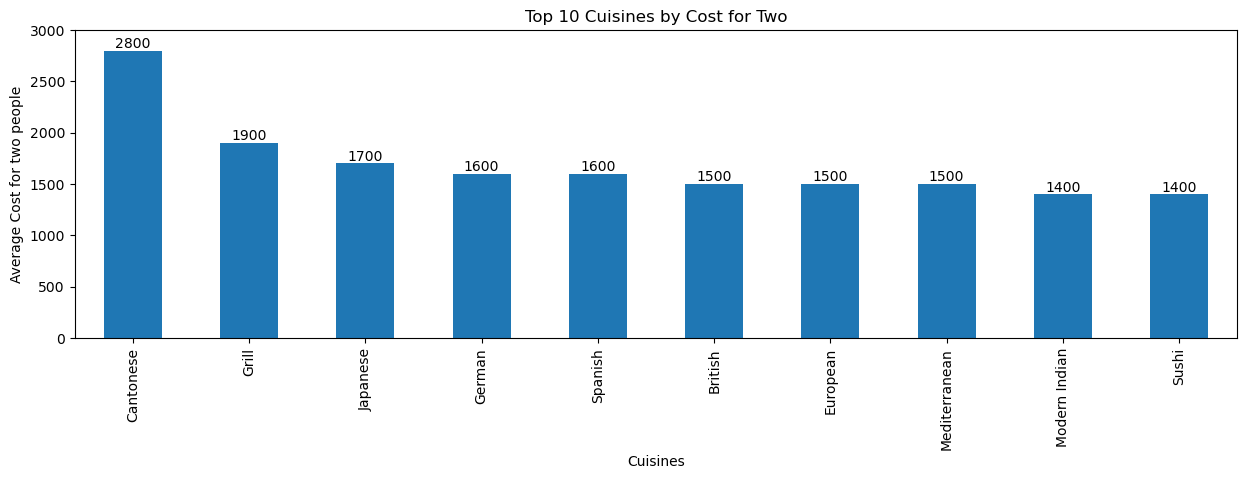

In [118]:
plt.figure(figsize=(15,4))
ax = uniqCuisines_cost.head(10).plot(kind='bar',
                       ylabel="Average Cost for two people",
                       xlabel="Cuisines",
                       ylim=[0,3000],
                       title="Top 10 Cuisines by Cost for Two"
                       )
ax.bar_label(ax.containers[0])
plt.show()

**Restaurants serving Cantonese cuisines has higher average cost for two people(2800 Rs)\
followed by Grill cuisines with 1900Rs and Lounge with 1700Rs**

## **listed_in(type)**

**These are the categories in which Restaurants are listed on Zomato**

### Grouped

In [122]:
df["listed_in(type)"].value_counts()

listed_in(type)
Delivery, Dine-out                                                        4619
Delivery                                                                  2929
Dine-out                                                                  1938
Delivery, Desserts                                                         871
Desserts                                                                   450
Cafes, Delivery, Dine-out                                                  319
Dine-out, Drinks & nightlife, Pubs and bars                                146
Buffet, Delivery, Dine-out                                                 138
Buffet, Dine-out                                                           125
Cafes, Dine-out                                                            123
Dine-out, Drinks & nightlife                                               101
Delivery, Desserts, Dine-out                                                88
Cafes, Delivery, Desserts, Dine-out 

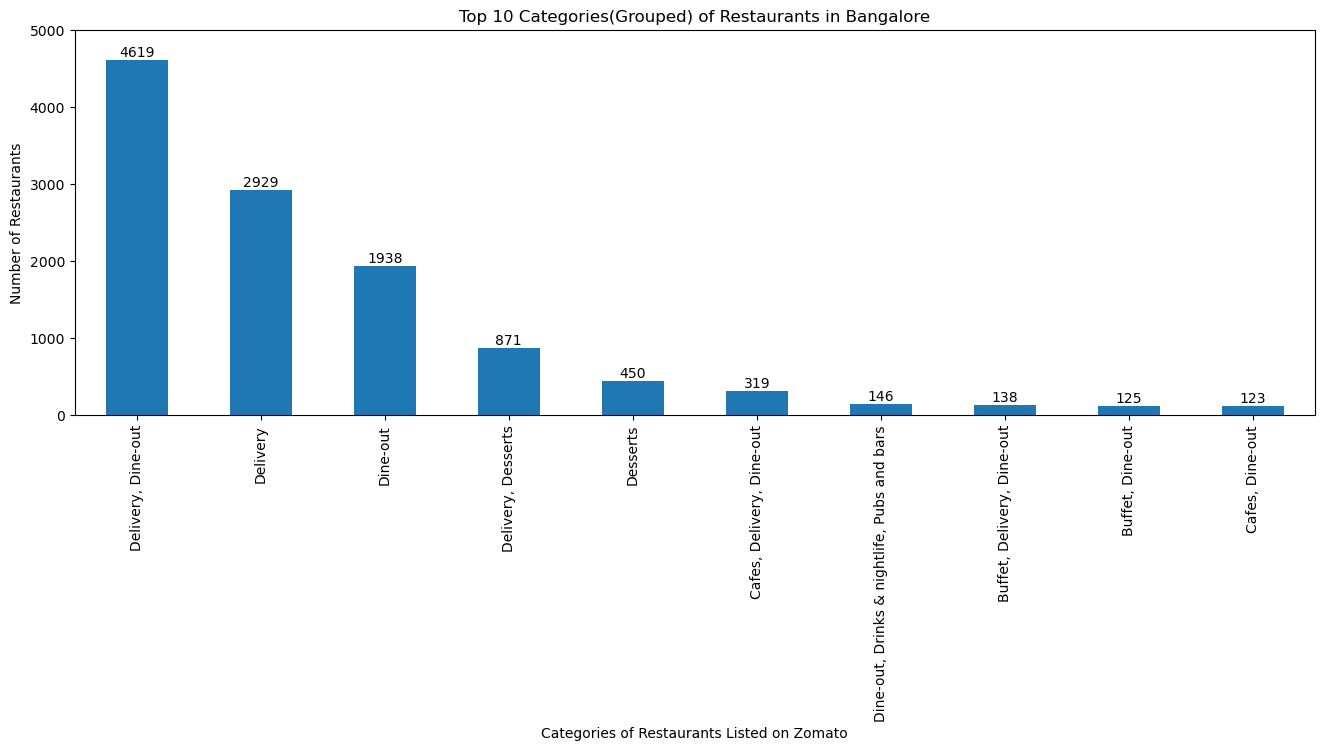

In [127]:
ax = df["listed_in(type)"].value_counts().head(10).plot(kind="bar",
                                        xlabel="Categories of Restaurants Listed on Zomato",
                                        ylabel="Number of Restaurants",
                                        title="Top 10 Categories(Grouped) of Restaurants in Bangalore",
                                        ylim=[0,5000],
                                        figsize=(16,5))
ax.bar_label(ax.containers[0],label_type='edge',fontsize=10)
plt.show()

**The highest number of restaurants are listed in Delivery and Dine-out both, \
followed by those listed in Delivery and Dine-out alone**

### Ungrouped ( Restaurants listed in multiple categories )

In [128]:
#Calculating percentage of unique categories
uniq_cat = df["listed_in(type)"].str.split(', ').explode()
uniq_cat_perc = uniq_cat.value_counts().map(lambda x : round(x*100/df.shape[0],2))
uniq_cat_perc

listed_in(type)
Delivery              74.84
Dine-out              64.47
Desserts              13.39
Cafes                  5.72
Drinks & nightlife     3.40
Pubs and bars          2.83
Buffet                 2.73
Name: count, dtype: float64

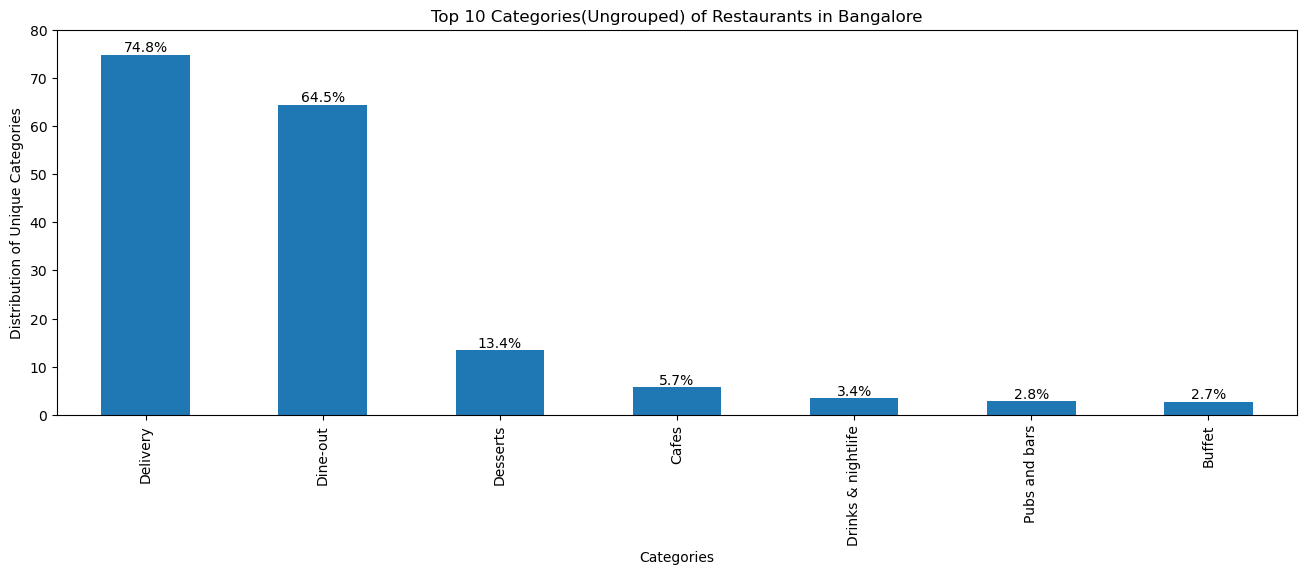

In [129]:
ax = uniq_cat_perc.head(10).plot(kind="bar",
                                xlabel="Categories",
                                ylabel="Distribution of Unique Categories",
                                title="Top 10 Categories(Ungrouped) of Restaurants in Bangalore",
                                ylim=[0,80],
                                figsize=(16,5))
ax.bar_label(ax.containers[0],label_type='edge',fontsize=10,fmt="%0.1f%%")
plt.show()

**74.8% of restaurants are listed in Delivery category out of total Restaurants(12453) \
followed by Dine-out(64.5%) and Desserts(13.4%)**

In [131]:
#Calculating average ratings and total votes per unique cat
uniqCat_ratings = pd.merge(uniq_cat,df[["ratings","votes"]],left_index=True,right_index=True)
uniqCat_ratings = uniqCat_ratings.groupby('listed_in(type)').agg(
                                                avg_rating=("ratings", "mean"),
                                                total_votes=("votes", "sum")
                                            ).round(1).sort_values(["avg_rating","total_votes"], ascending=False).head(10)
uniqCat_ratings

,avg_rating,total_votes
listed_in(type),,
Drinks & nightlife,3.9,455719
Pubs and bars,3.9,354382
Buffet,3.9,341239
Cafes,3.6,280574
Desserts,3.5,220855
Dine-out,3.4,1968045
Delivery,3.3,1593058


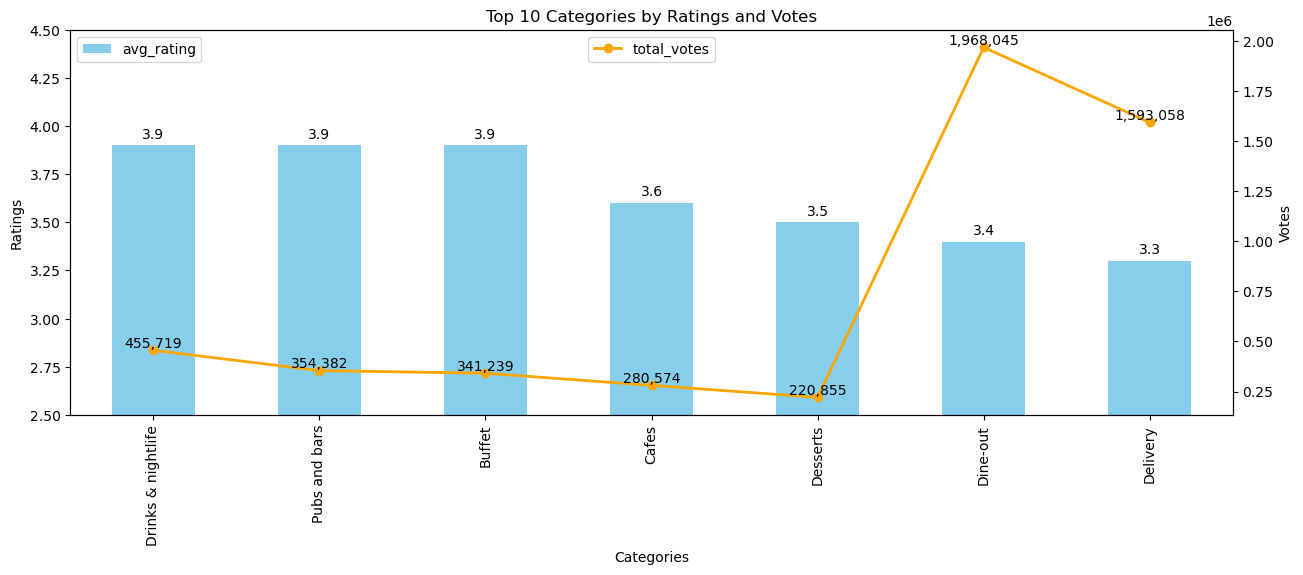

In [132]:
plt.figure(figsize=(15,5))
ax1 = uniqCat_ratings.avg_rating.plot(kind='bar',
                       ylabel="Ratings",
                       xlabel="Categories",
                       ylim=[2.5,4.5],
                       color="skyblue",
                       title="Top 10 Categories by Ratings and Votes")
ax1.bar_label(ax1.containers[0], padding=3, fmt="%.1f")
ax2 = ax1.twinx()
uniqCat_ratings.total_votes.plot(
                       ylabel="Votes",
                       ax=ax2,
                       color='orange', marker='o', linewidth=2
                       )

for x, y in zip(np.arange(10), uniqCat_ratings['total_votes']):
    ax2.text(x, y+50, f'{int(y):,}', color='black', ha='center', va='bottom', fontsize=10)

lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, loc='upper left')
lines, labels = ax2.get_legend_handles_labels()
ax2.legend(lines, labels, loc='upper center')

ax.bar_label(ax.containers[0])
plt.show()

**Restaurants listed in Drinks & nightlife, Pubs and bars , Buffet category has a higher average rating of 3.9,\
followed by Restaurants listed in Cafes and Deserts with average ratings of 3.6 and 3.5 resp. \
However, the total number of votes for Restaurants listed in Dine-out category(19,68,045) are much higher than all other categories. \
This suggests that the smaller group of reviewers for Restaurants listed in other categories like Drinks & nightlife gave comparatively high ratings, \
while the larger number of voters for Restaurants listed in Dine-out likely included more mixed or negative reviews,\
bringing their overall average down to 3.4 .** 

In [139]:
#Calculating average cost for two people for unique categories
uniqCat_cost = pd.merge(uniq_cat,df.cost_for_two,left_index=True,right_index=True)
uniqCat_cost = uniqCat_cost.groupby('listed_in(type)')["cost_for_two"].mean().round(-2).sort_values(ascending=False)
uniqCat_cost

listed_in(type)
Drinks & nightlife    1400.0
Buffet                1300.0
Pubs and bars         1300.0
Cafes                  600.0
Delivery               500.0
Dine-out               500.0
Desserts               400.0
Name: cost_for_two, dtype: float64

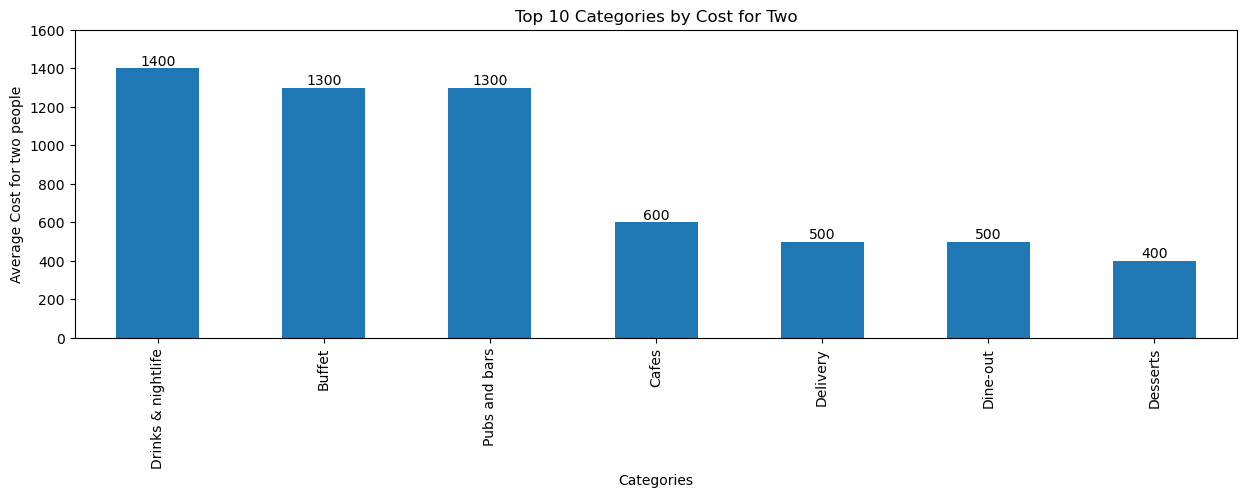

In [141]:
plt.figure(figsize=(15,4))
ax = uniqCat_cost.head(10).plot(kind='bar',
                       ylabel="Average Cost for two people",
                       xlabel="Categories",
                       ylim=[0,1600],
                       title="Top 10 Categories by Cost for Two"
                       )
ax.bar_label(ax.containers[0])
plt.show()

**Restaurants listed in Drinks & nightlife category has higher average cost for two people(1400 Rs)\
followed by Restaurants listed in Buffet with 1300Rs and Pubs and bars with 1300Rs**

## **Best Location**

**What can be a best location ?**
1) A location having 200+ restaurants
2) Varieties of Restaurants ( eg : Dining,Cafe, Desert etc)
3) Ratings 3+
4) Number of Votes high (famous)
5) Different types of cuisines available (eg: North Indian, South Indian, Chinese etc)
6) Affordable ( Cost for two < 2000Rs )

In [292]:
#Constructing a database to get best locations from the given criteria
bestLoc = df.groupby("location").agg(
                    No_of_rest = ("location","count"),
                    avg_ratings = ("ratings",lambda x : round(x.mean(),1) ),
                    total_votes = ("votes","sum"),
                    No_of_restType = ("rest_type", lambda x : x.str.split(', ').explode().nunique() ),
                    No_of_cuisines = ("cuisines", lambda x : x.str.split(', ').explode().nunique() ),
                    avg_costForTwo = ("cost_for_two",lambda x : round(x.mean(),-2))
                    ).query('No_of_rest > 200 and avg_ratings > 3 and \
                    total_votes > 30000 and No_of_restType > 10 and \
                    No_of_cuisines > 55 and avg_costForTwo < 2000')

In [293]:
bestLoc

,No_of_rest,avg_ratings,total_votes,No_of_restType,No_of_cuisines,avg_costForTwo
location,,,,,,
BTM,723,3.2,71490,16,57,400.0
HSR,703,3.3,114745,16,62,400.0
Indiranagar,528,3.5,258584,16,71,600.0
JP Nagar,523,3.3,89698,17,58,500.0
Koramangala 5th Block,265,3.8,179224,16,62,600.0
Marathahalli,685,3.3,137373,18,60,500.0
Sarjapur Road,337,3.3,67522,15,61,500.0
Whitefield,884,3.3,149203,20,69,600.0


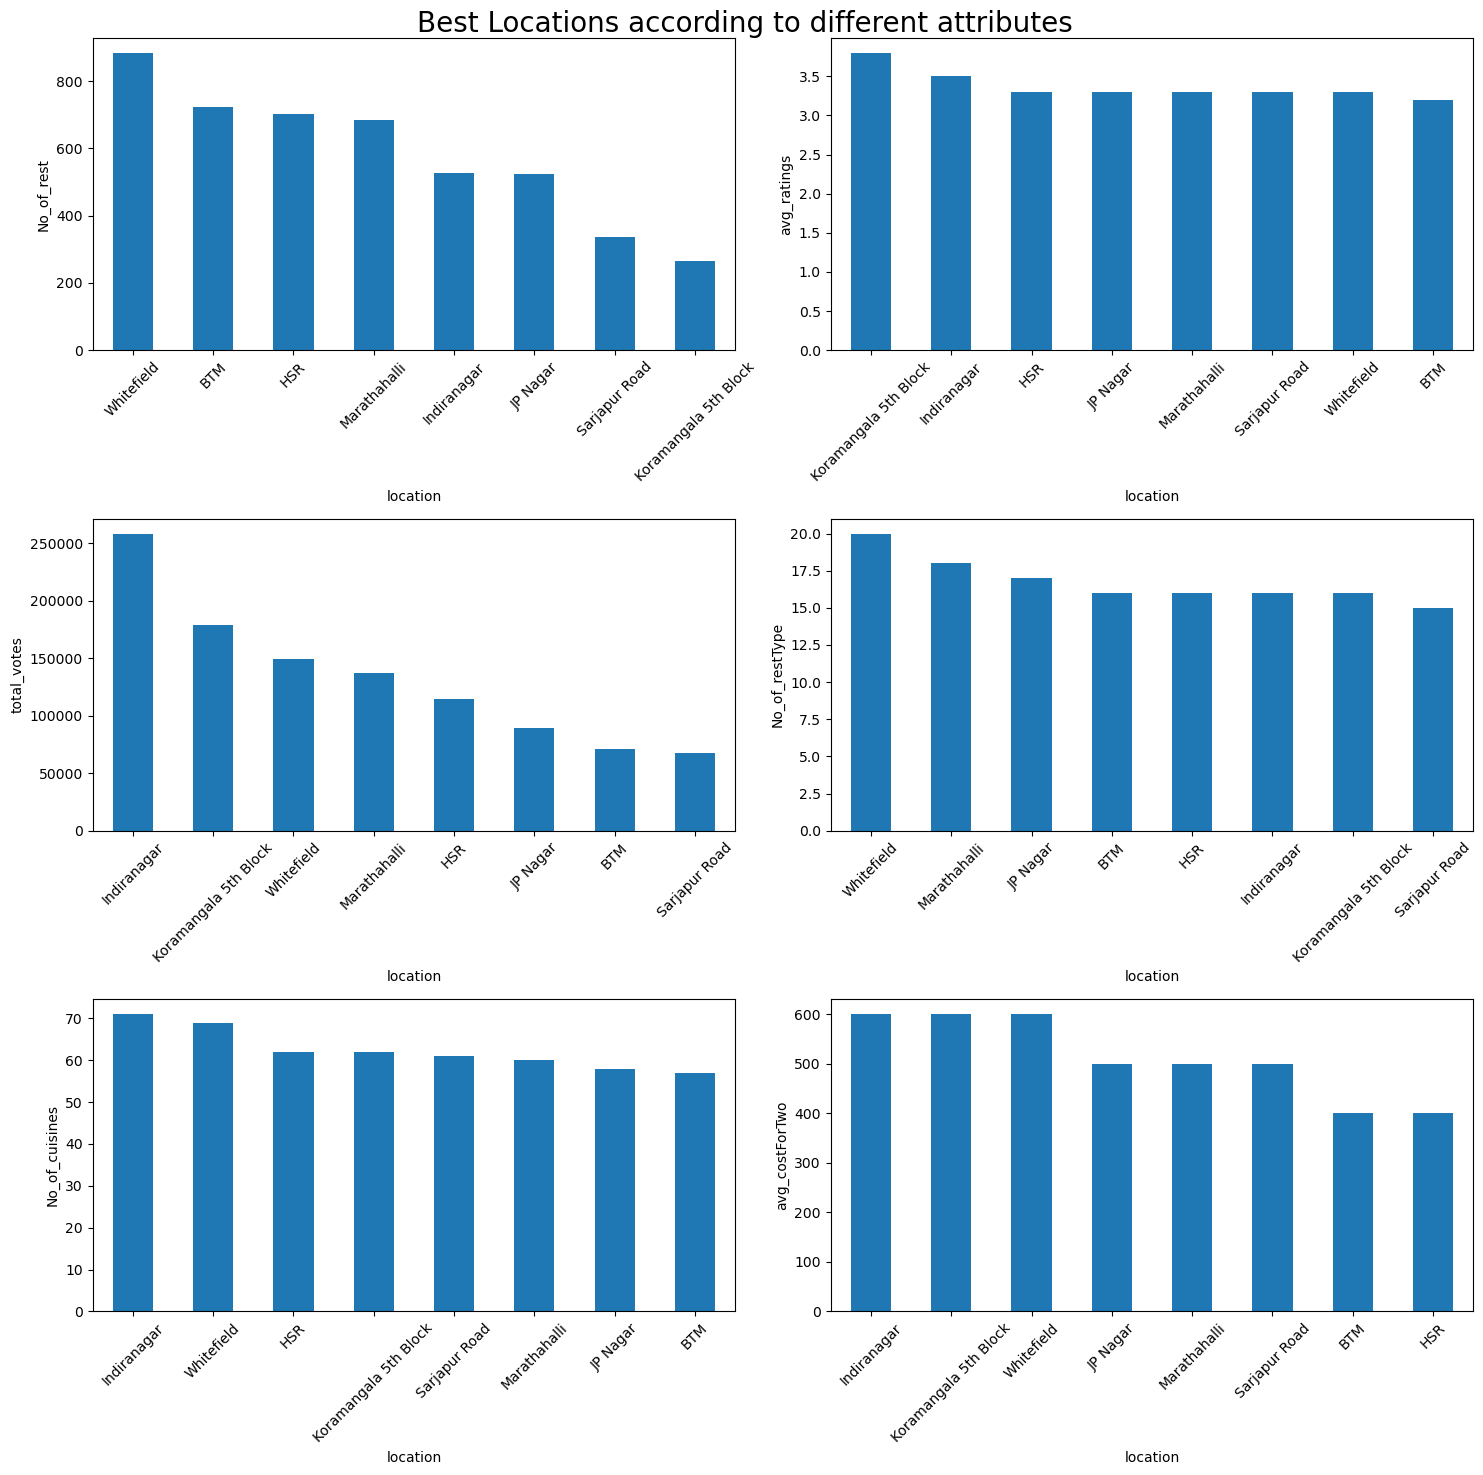

In [295]:
fig,ax = plt.subplots(3,2,figsize=(15,5*3))
cols = bestLoc.columns.values.reshape(3,2)
for i in range(len(cols)):
    for j,col in enumerate(cols[i]):
        bestLoc[col].sort_values(ascending=False).plot(kind="bar",ax=ax[i][j],rot=45,ylabel=col)
plt.suptitle("Best Locations according to different attributes",fontsize=20,ha='center')
plt.tight_layout()    

**From the above data and graphs, we can clearly conclude that the best locations for restaurants in Bangalore are: \
BTM, HSR, Indiranagar, JP Nagar, Koramangala 5th Block, Marathahalli, Sarjapur Road, and Whitefield. \
Each of these locations hosts over 200 restaurants, with average ratings exceeding 3.0 and total votes surpassing 30,000. \
They feature more than 10 distinct types of restaurants, offering over 55 exquisite cuisines, \
while maintaining an average cost for two people below ₹700.** 


# Final Conclusion

*The Zomato Bangalore dataset reveals key trends across 12,453 unique restaurants, with Café Coffee Day having the highest number of outlets.\
Most restaurants offer quick bites, North Indian cuisine, and operate as delivery or dine-out.\
Online ordering is available in over half the restaurants, while only 8% offer table reservations.\
Restaurants that support both services tend to have higher ratings and vote counts. \
Cost for two mostly ranges between ₹200–₹600, and ratings generally fall between 3.5 and 4.0.\
Whitefield, Indiranagar, and Koramangala emerge as the best locations—offering the most restaurants,\
diverse cuisines, services, and high customer engagement.*